In [48]:
import pandas as pd
data=pd.read_csv('./data_set.csv').drop('Unnamed: 0',axis=1)


In [49]:

data.head()

,y,X
0,-0.971234,1.713161
1,-0.356422,1.879953
2,0.847928,1.330229
3,-0.244568,0.530830
4,0.313736,1.591408


<AxesSubplot:>

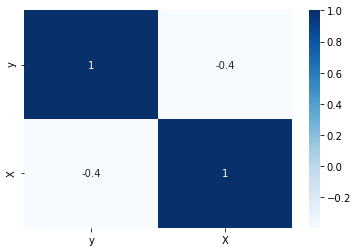

In [50]:
import seaborn as sb
corr = data.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

In [51]:
data.describe()

,y,X
count,1000.000000,1000.000000
mean,0.036087,1.008664
std,0.783190,0.589962
min,-1.828837,0.000637
25%,-0.656332,0.470037
50%,0.066498,1.025089
75%,0.733782,1.514344
max,2.027871,1.998735


# Zadanie.

In [23]:
data = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
#data=data[:180]
data.fillna(method='pad',inplace=True)

In [52]:
from sklearn.model_selection import train_test_split
y=data[['y']].values
X=data[['X']].values
X_train, X_test, y_train, y_test=train_test_split(X,y)

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()
model=Ridge(alpha=0.2)
model = make_pipeline(PolynomialFeatures(3), model)
model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)
y_pred_train=model.predict(X_train)



In [54]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
mape_test=mean_absolute_percentage_error(y_pred_test,y_test)
mape_tr= mean_absolute_percentage_error(y_pred_train,y_train)

mse_test=mean_squared_error(y_pred_test,y_test)
mse_tr= mean_squared_error(y_pred_train,y_train)


print(f'Mse test {mse_test}')
print(f'Mse tr {mse_tr}')

Mse test 0.4909834021024633
Mse tr 0.4506549219092524


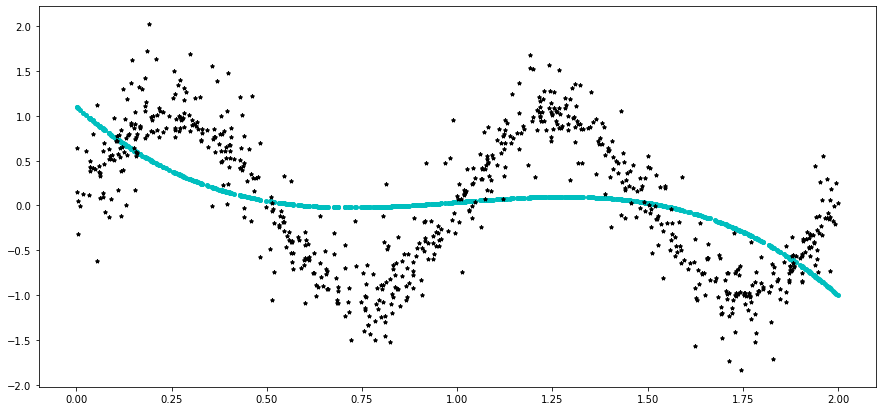

In [55]:
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(15,7))
plt.plot(X_train,y_pred_train,'co',markersize=4,label='Predykcje na zbiorze testowym')
#plt.plot(X_test,y_pred_test,'go',markersize=4,label='Predykcje na zbiorze testowym')
#plt.plot(X_test,y_test,'r*',markersize=4,label='Zbiór testowy')
plt.plot(X_train,y_train,'k*',markersize=4,label='Zbiór treningowy')

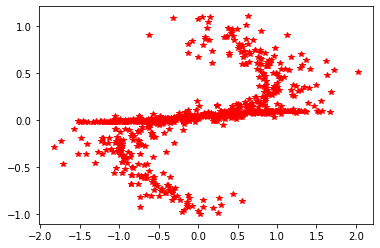

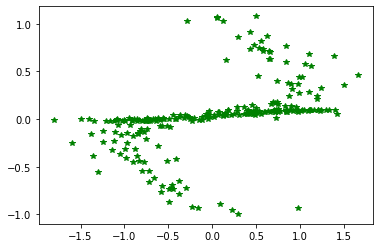

In [56]:
plt.plot(y_train,y_pred_train,'r*')
plt.show()
plt.plot(y_test,y_pred_test,'g*')